# Importacion de la base de datos y los archivos de configuracion

In [1]:
# Descargamos los archivos de la nube donde los almacenamos
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kLYq0EJxEgSWtOLpb7YQWWw77zkOSVG2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kLYq0EJxEgSWtOLpb7YQWWw77zkOSVG2" -O dataset.zip && rm -rf /tmp/cookies.txt 



--2021-12-10 05:40:08--  https://docs.google.com/uc?export=download&confirm=JvMx&id=1kLYq0EJxEgSWtOLpb7YQWWw77zkOSVG2
Resolving docs.google.com (docs.google.com)... 172.217.204.139, 172.217.204.100, 172.217.204.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-4s-docs.googleusercontent.com/docs/securesc/lu1o7l3kgjh30v2davbiod87pl6n8cdl/bqdm3smjcehg54atbb6205fkc69qimk1/1639114800000/08648504914934798558/12834257226821678743Z/1kLYq0EJxEgSWtOLpb7YQWWw77zkOSVG2?e=download [following]
--2021-12-10 05:40:08--  https://doc-0c-4s-docs.googleusercontent.com/docs/securesc/lu1o7l3kgjh30v2davbiod87pl6n8cdl/bqdm3smjcehg54atbb6205fkc69qimk1/1639114800000/08648504914934798558/12834257226821678743Z/1kLYq0EJxEgSWtOLpb7YQWWw77zkOSVG2?e=download
Resolving doc-0c-4s-docs.googleusercontent.com (doc-0c-4s-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connect

In [ ]:
# Clonamos repositorio donde se encuentran archivos de funciones 
!git clone https://github.com/CamiloSaboA-csv/digitalizador_manuscritos.git

# Descompresion de los archivos

tener un poco de paciencia, esto puede tardar un poco, aproximadamente 4 minutos.

In [2]:
%%time
!unzip "dataset.zip" -d "/content/dataset/"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: /content/dataset/uppercase/validation/U/002203.png  
  inflating: /content/dataset/uppercase/validation/U/002204.png  
  inflating: /content/dataset/uppercase/validation/U/002205.png  
  inflating: /content/dataset/uppercase/validation/U/002206.png  
  inflating: /content/dataset/uppercase/validation/U/002207.png  
  inflating: /content/dataset/uppercase/validation/U/002208.png  
  inflating: /content/dataset/uppercase/validation/U/002209.png  
  inflating: /content/dataset/uppercase/validation/U/002210.png  
  inflating: /content/dataset/uppercase/validation/U/002211.png  
  inflating: /content/dataset/uppercase/validation/U/002212.png  
  inflating: /content/dataset/uppercase/validation/U/002213.png  
  inflating: /content/dataset/uppercase/validation/U/002214.png  
  inflating: /content/dataset/uppercase/validation/U/002215.png  
  inflating: /content/dataset/uppercase/validation/U/002216.png  
  inflati

# Librerias necesarias

In [7]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras


Importacion de funciones implementadas en archivos adicionales con el fin de brindar una mejor organización

In [10]:
# importing sys
import sys
  
# adding digitalizador_manuscritos to the system path
sys.path.insert(0, '/content/digitalizador_manuscritos')
  
# function
from _01_functions import *


ModuleNotFoundError: ignored

# Cargaremos los datos

In [ ]:
# Load the dataset image

#Local enviroment
# dir = r"Q:\One_drive_UDEA\1_UDEA_Esp_Analitica\0_Monografia\test"

# dir = "/content/dataset"


#Colab enviroment
# definimos la ruta donde se encuentran los archivos del dataset

dir_lowecase_train  = "/content/dataset/lowecase/train"
dir_lowecase_test  = "/content/dataset/lowecase/test"
dir_lowecase_validation  = "/content/dataset/lowecase/validation"

# dir_uppercase_train = "/content/dataset/uppercase/train"
# dir_uppercase_test = "/content/dataset/uppercase/test"
# dir_uppercase_validation = "/content/dataset/uppercase/validation"

# dir_numbers_train  = "/content/dataset/numbers/train"
# dir_numbers_test  = "/content/dataset/numbers/test"
# dir_numbers_validation  = "/content/dataset/numbers/validation"


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(
    directory = dir,
    target_size=(300, 300))

Found 22868 images belonging to 3 classes.


## Separacion de los datos
Dado que el dataset inicial ya tena una separacion inicial, simplemente asignamos los datos a las variables correspondientes.

inicialmente solo vamos a cargar los datos de entrenamiento

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(
    directory = dir_lowecase_train,
    target_size=(300, 300))

# validation = train_datagen.flow_from_directory(
#     directory =dir_lowecase_validation ,
#     target_size=(300, 300))

# test = train_datagen.flow_from_directory(
#     directory = dir_lowecase_test,
#     target_size=(300, 300))

## Exploración de los datos

In [ ]:
#show the len of the dataset and the number of images in each class
print('Numero de muestras:', train.samples )
print(f'Son {train.num_classes} clases diferentes: {train.class_indices}') 
#print('', len(train))
print('tamaño de las imagenes:', train.image_shape)

Numero de muestras: 22868
Son 3 clases diferentes: {'0': 0, '1': 1, '2': 2}
tamaño de las imagenes: (300, 300, 3)


Verificamos que los datos esten balanceados y que el dataset tenga una distribucion uniforme.

(array([7310.,    0., 8313.,    0., 7245.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

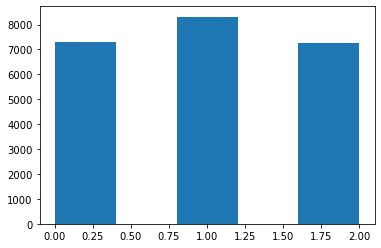

In [ ]:
plt.hist(train.classes, bins=5)

Ploteamos algunas imagenes de los datos para verificar que se hayan cargado correctamente.

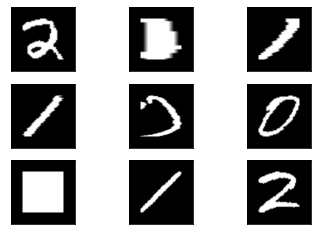

In [ ]:
plot_images(train) # ploting some images for verification 